## Exercise 1 - Bayes classification system

Liechti Matthieu - Loup Olivia

In [62]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [63]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [64]:
X_train, y_train = read_data('O:\Mon Drive\HES-SO\MachLE\PW3\ex1-data-train.csv') #from personal computer
# If need to use by extern of project
# X_train, y_train = read_data('ex1-data-train.csv')

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\matth\AppData\Local\Temp\ipykernel_31804\1555180689.py:1: SyntaxWarning: invalid escape sequence '\M'
  X_train, y_train = read_data('O:\Mon Drive\HES-SO\MachLE\PW3\ex1-data-train.csv')


In [65]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [66]:
# TODO: Compute the priors
print(y_train)
nombre_de_zeros = np.count_nonzero(y_train == 0)
nombre_de_un = np.count_nonzero(y_train)
print(nombre_de_zeros)
print(nombre_de_un)
PC0 = nombre_de_zeros/(nombre_de_zeros + nombre_de_un)
PC1 = nombre_de_un/(nombre_de_zeros + nombre_de_un)
print(PC0,PC1)

[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
40
60
0.4 0.6


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

In [67]:
valeurs_exam1_reussi = X_train.iloc[y_train == 1, 0]
valeurs_exam2_reussi = X_train.iloc[y_train == 1, 1]
valeurs_exam1_fail = X_train.iloc[y_train == 0, 0]
valeurs_exam2_fail = X_train.iloc[y_train == 0, 1]

hist_exam1_r, bins_exam1_r = np.histogram(valeurs_exam1_reussi, bins="auto")
hist_exam2_r, bins_exam2_r = np.histogram(valeurs_exam2_reussi, bins="auto")
hist_exam1_f, bins_exam1_f = np.histogram(valeurs_exam1_fail, bins="auto")
hist_exam2_f, bins_exam2_f = np.histogram(valeurs_exam2_fail, bins="auto")


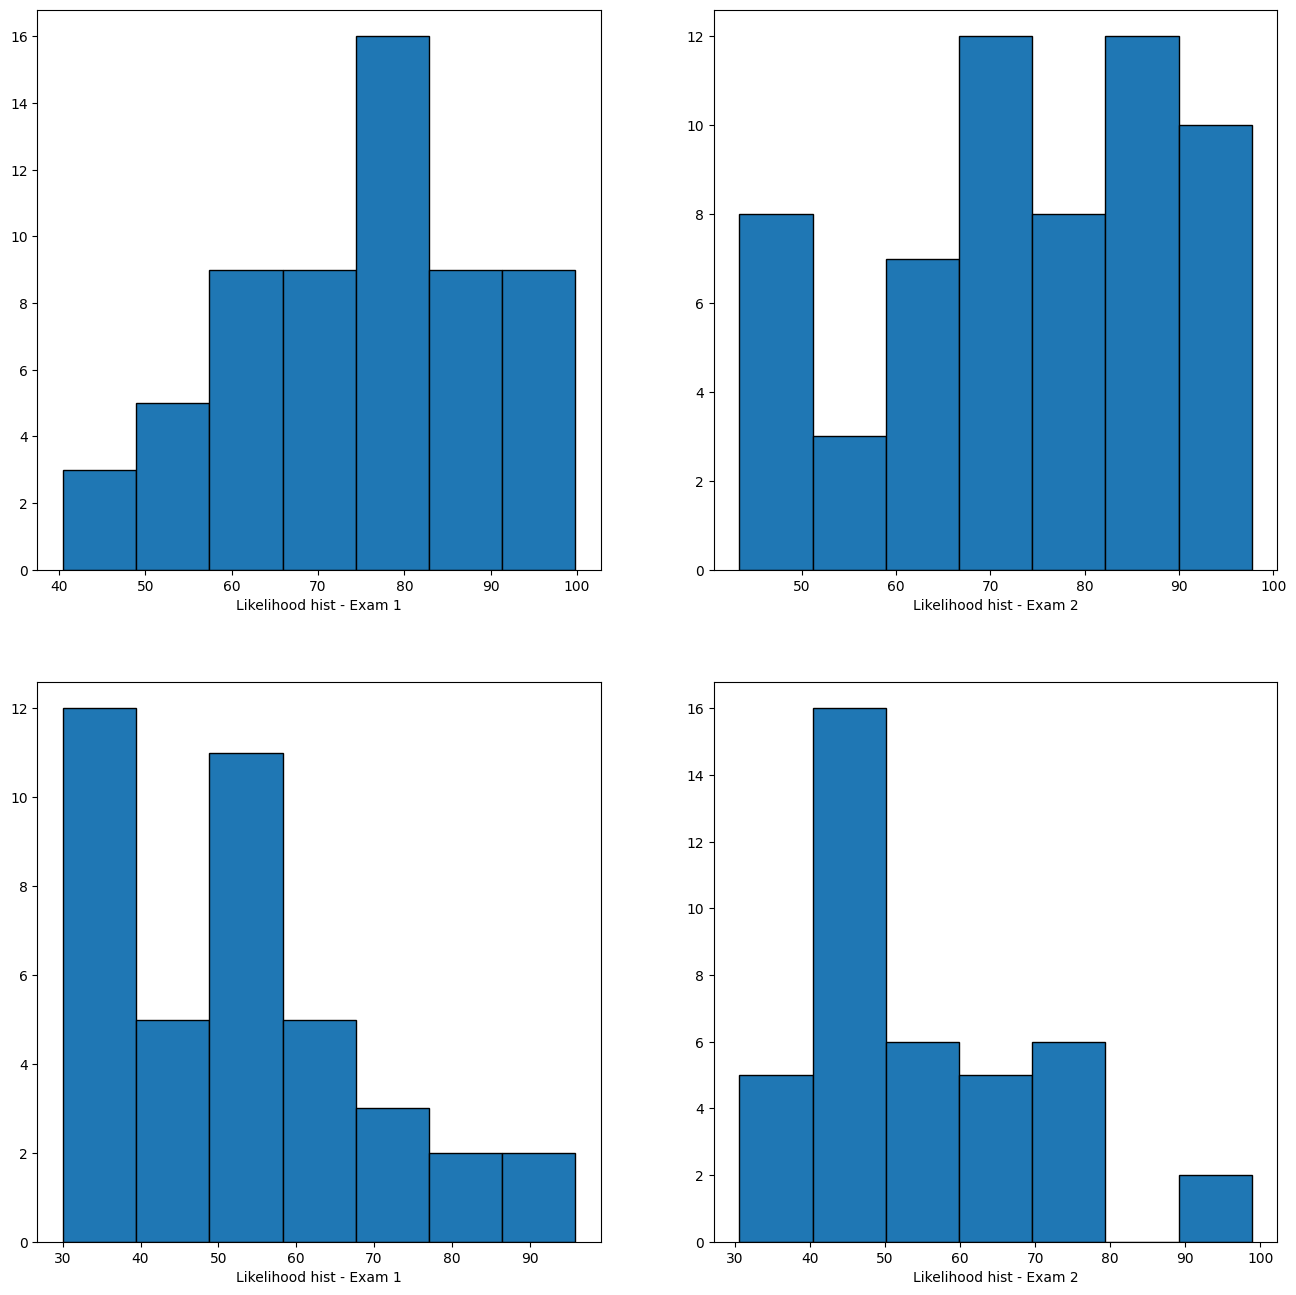

In [68]:
# TODO: Compute histograms



# TODO: plot histograms

plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
plt.bar(bins_exam1_r[:-1], hist_exam1_r, width=np.diff(bins_exam1_r), edgecolor="black", align="edge")
plt.xlabel('Likelihood hist - Exam 1')

plt.subplot(2, 2, 2)
plt.bar(bins_exam2_r[:-1], hist_exam2_r, width=np.diff(bins_exam2_r), edgecolor="black", align="edge")
plt.xlabel('Likelihood hist - Exam 2')

plt.subplot(2, 2, 3)
plt.bar(bins_exam1_f[:-1], hist_exam1_f, width=np.diff(bins_exam1_f), edgecolor="black", align="edge")
plt.xlabel('Likelihood hist - Exam 1')

plt.subplot(2, 2, 4)
plt.bar(bins_exam2_f[:-1], hist_exam2_f, width=np.diff(bins_exam2_f), edgecolor="black", align="edge")
plt.xlabel('Likelihood hist - Exam 2')

plt.show()

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [69]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    # TODO: compute likelihoods from histograms outputs

    indexVal = np.digitize(x, bin_edges)

    if indexVal < 1 or indexVal >= len(hist_values):
        return 0.0  # if x is out of the histogram

    bin_count = hist_values[indexVal-1]
    total_count = np.sum(hist_values)

    return bin_count / total_count

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [70]:
X_test, y_test = read_data("O:\Mon Drive\HES-SO\MachLE\PW3\ex1-data-test.csv")#from personal computer
# If need to use by extern of project
# X_train, y_train = read_data('ex1-data-train.csv')

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\matth\AppData\Local\Temp\ipykernel_31804\1227422522.py:1: SyntaxWarning: invalid escape sequence '\M'
  X_test, y_test = read_data("O:\Mon Drive\HES-SO\MachLE\PW3\ex1-data-test.csv")


In [71]:
# print(hist_exam1_f,bins_exam1_f)

In [72]:
y_pred = [] 
y_pred_x1 = [] 
y_pred_x2 = []

for index, sample in X_test.iterrows(): #only for x1 
    PC0Lix1 = PC0 * likelihood_hist(sample.iloc[0], hist_exam1_f, bins_exam1_f) 
    PC1Lix1 = PC1 * likelihood_hist(sample.iloc[0], hist_exam1_r, bins_exam1_r)

    y_pred_x1.append(1 if PC1Lix1 > PC0Lix1 else 0)

    # Only for x2
    PC0Lix2 = PC0 * likelihood_hist(sample.iloc[1], hist_exam2_f, bins_exam2_f)
    PC1Lix2 = PC1 * likelihood_hist(sample.iloc[1], hist_exam2_r, bins_exam2_r)


    y_pred_x2.append(1 if PC1Lix2 > PC0Lix2 else 0)

    # Use both
    PC0LiAll = (PC0 * likelihood_hist(sample.iloc[1], hist_exam2_f, bins_exam2_f)) * (PC0 * likelihood_hist(sample.iloc[0], hist_exam1_f, bins_exam1_f))
    PC1LiAll = (PC1 * likelihood_hist(sample.iloc[1], hist_exam2_r, bins_exam2_r)) * (PC1 * likelihood_hist(sample.iloc[0], hist_exam1_r, bins_exam1_r))

    if PC1LiAll > PC0LiAll:
        y_pred.append(1)
    else:
        y_pred.append(0)

    
allx1x2 = accuracy_score(y_test, y_pred) 
onlyX1 = accuracy_score(y_test, y_pred_x1) 
onlyX2 = accuracy_score(y_test, y_pred_x2)

print(allx1x2) 
print(onlyX1) 
print(onlyX2)

0.83
0.66
0.71


Which system is the best ?

We can see that using both exams provide better results

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [83]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    exponent = -((x - mean) ** 2) / (2 * var)
    likelihood = (1 / (np.sqrt(2 * np.pi * var))) * np.exp(exponent)

    return likelihood

In [84]:
# TODO: Compute mean and variance for each classes and each features (8 values)
# Mean & variance of feature 1 class 0
mean_val_ex1_f = np.mean(valeurs_exam1_fail)
var_val_ex1_f = np.var(valeurs_exam1_fail)

# Mean & variance of feature 1 of class 1
mean_val_ex1_r = np.mean(valeurs_exam1_reussi)
var_val_ex1_r = np.var(valeurs_exam1_reussi)

# Mean & variance of feature 2 class 0
mean_val_ex2_f = np.mean(valeurs_exam2_fail)
var_val_ex2_f = np.var(valeurs_exam2_fail)

# Mean & variance of feature 2 of class 1
mean_val_ex2_r = np.mean(valeurs_exam2_reussi)
var_val_ex2_r = np.var(valeurs_exam2_reussi)


In [85]:
print(mean_val_ex1_f,var_val_ex1_f)

52.032301098426046 300.2699173213914


In [86]:
# TODO: predict on test set in the 3 cases

y_pred_G = [] 
y_pred_x1_G = [] 
y_pred_x2_G = []

for index, sample in X_test.iterrows(): #only for x1 
    PC0Lix1 = PC0 * likelihood_univariate_gaussian(sample.iloc[0], mean_val_ex1_f, var_val_ex1_f) 
    PC1Lix1 = PC1 * likelihood_univariate_gaussian(sample.iloc[0], mean_val_ex1_r, var_val_ex1_r)

    y_pred_x1_G.append(1 if PC1Lix1 > PC0Lix1 else 0)

    # Only for x2
    PC0Lix2 = PC0 * likelihood_univariate_gaussian(sample.iloc[1], mean_val_ex2_f, var_val_ex2_f)
    PC1Lix2 = PC1 * likelihood_univariate_gaussian(sample.iloc[1], mean_val_ex2_r, var_val_ex2_r)


    y_pred_x2_G.append(1 if PC1Lix2 > PC0Lix2 else 0)

    # Use both
    PC0LiAll = (PC0 * likelihood_univariate_gaussian(sample.iloc[1], mean_val_ex2_f, var_val_ex2_f)) * (PC0 * likelihood_univariate_gaussian(sample.iloc[0], mean_val_ex1_f, var_val_ex1_f))
    PC1LiAll = (PC1 * likelihood_univariate_gaussian(sample.iloc[1], mean_val_ex2_r, var_val_ex2_r)) * (PC1 * likelihood_univariate_gaussian(sample.iloc[0], mean_val_ex1_r, var_val_ex1_r))

    if PC1LiAll > PC0LiAll:
        y_pred_G.append(1)
    else:
        y_pred_G.append(0)

    
allx1x2_G = accuracy_score(y_test, y_pred_G) 
onlyX1_G = accuracy_score(y_test, y_pred_x1_G) 
onlyX2_G = accuracy_score(y_test, y_pred_x2_G)

print(allx1x2_G) 
print(onlyX1_G) 
print(onlyX2_G)

0.008769297125152106
0.92
0.71
0.72
